<a href="https://colab.research.google.com/github/yqh022/Coding3/blob/main/%E2%80%9Cfinal_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/taesungp/contrastive-unpaired-translation.git CUT
%cd CUT

Cloning into 'CUT'...
remote: Enumerating objects: 282, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 282 (delta 0), reused 1 (delta 0), pack-reused 278
Receiving objects: 100% (282/282), 17.91 MiB | 14.03 MiB/s, done.
Resolving deltas: 100% (141/141), done.
/content/CUT


In [ ]:
!pip install -r requirements.txt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=d36cb020179fef1495cd97d586fe977445c3006149bb9643ff8b08ebd631a394
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=4325181782cdb165db1afdce821f851fbfea609871b41453eebf276320454725
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built visdom GPUtil


In [ ]:
!bash ./datasets/download_cut_dataset.sh monet2photo >/dev/null; echo download success
#Download the monet2photo dataset

+ FILE=monet2photo
+ [[ monet2photo != \a\e\_\p\h\o\t\o\s ]]
+ [[ monet2photo != \a\p\p\l\e\2\o\r\a\n\g\e ]]
+ [[ monet2photo != \s\u\m\m\e\r\2\w\i\n\t\e\r\_\y\o\s\e\m\i\t\e ]]
+ [[ monet2photo != \h\o\r\s\e\2\z\e\b\r\a ]]
+ [[ monet2photo != \m\o\n\e\t\2\p\h\o\t\o ]]
+ [[ monet2photo == \c\i\t\y\s\c\a\p\e\s ]]
+ echo 'Specified [monet2photo]'
+ URL=https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/monet2photo.zip
+ ZIP_FILE=./datasets/monet2photo.zip
+ TARGET_DIR=./datasets/monet2photo/
+ wget --no-check-certificate -N https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/monet2photo.zip -O ./datasets/monet2photo.zip
for details.

--2023-06-15 16:04:17--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/monet2photo.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.244.190
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

In [ ]:
%%bash
cd datasets
mkdir m2p_mini
mkdir m2p_mini/trainA
mkdir m2p_mini/trainB
cd monet2photo/trainA
echo $(pwd) #Create datasets folders
find . -maxdepth 1 -type f -name "*" | head -100 | xargs -I{} cp {} ../../m2p_mini/trainA
cd ../trainB
echo $(pwd)
find . -maxdepth 1 -type f -name "*" | head -100 | xargs -I{} cp {} ../../m2p_mini/trainB
#Use the first 100 images in both folders of the dataset

/content/CUT/datasets/monet2photo/trainA
/content/CUT/datasets/monet2photo/trainB


In [ ]:
%env steady_epoch=20
%env decline_epoch=2
%env origname = photo2monet1
%env dataroot = ./datasets/m2p_mini
name = 'photo2monet1'
dataroot = './datasets/m2p_mini'
!python train.py --dataroot $dataroot --name ${origname} --n_epochs $steady_epoch --n_epochs_decay $decline_epoch --direction BtoA


env: steady_epoch=20
env: decline_epoch=2
env: origname=photo2monet1
env: dataroot=./datasets/m2p_mini
----------------- Options ---------------
                 CUT_mode: CUT                           
               batch_size: 1                             
                    beta1: 0.5                           
                    beta2: 0.999                         
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/m2p_mini           	[default: placeholder]
             dataset_mode: unaligned                     
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: None                          
            display_ncols: 4                             
    

In [ ]:
name = 'photo2monet1'
%env name = photo2monet1

!python test.py --dataroot $dataroot --name $name --CUT_mode CUT --phase train --direction BtoA
#test the model

env: name=photo2monet1
----------------- Options ---------------
                 CUT_mode: CUT                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/m2p_mini           	[default: placeholder]
             dataset_mode: unaligned                     
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
               easy_label: experiment_name               
                    epoch: latest                        
                     eval: False                         
        flip_equivariance: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: xavier                        
                 input_nc:

In [ ]:
import matplotlib.pyplot as plt

def plot_losses(log_file):
    # read the text file
    log_file = f'checkpoints/{name}/loss_log.txt'
    with open(log_file, 'r') as file:
        content = file.read()

    # extract the values for each loss
    g_gan = []
    d_real = []
    d_fake = []
    g = []
    nce = []
    for line in content.split('\n'):
        if not line or line.startswith("==="):
            continue
        line = line[line.find("G_GAN"):]
        values = line.split()
        values = [v for v in values if not v.endswith(':')]

        g_gan.append(float(values[0].strip(',')))
        d_real.append(float(values[1].strip(':')))
        d_fake.append(float(values[2].strip(':')))
        g.append(float(values[3].strip(':')))
        nce.append(float(values[4]))

    # plot the 5 losses
    epochs = range(1, 6)
    plt.plot(g_gan, label='G_GAN')
    plt.plot(d_real, label='D_real')
    plt.plot(d_fake, label='D_fake')
    plt.plot(g, label='G')
    plt.plot(nce, label='NCE')
    plt.xlabel('iters')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_test(name):
    dirname = f'results/{name}/train_latest/images/'
    files = os.listdir(dirname+'real_A')[5:12]
    fig, axes = plt.subplots(len(files), 3, figsize=(15, 20))
    print(axes.size)
    axes[0][0]
    for i, f in enumerate(files):
        real = Image.open(os.path.join(dirname, 'real_A', f))
        fake = Image.open(os.path.join(dirname, 'fake_B', f))

        # 打开图像并转换为RGB模式
        image = Image.open(os.path.join(dirname, 'fake_B', f)).convert("RGB")

        # 将图像转换为NumPy数组
        np_image = np.array(image)

        # 提取绿色通道
        green_channel = np_image[:, :, 1]  # 绿色通道对应索引1

        # 创建与原始图像大小和通道数相同的新数组，并将绿色通道的值赋给其中的绿色通道
        rgb_image = np.zeros_like(np_image)
        rgb_image[:, :, 1] = green_channel

        # 将NumPy数组转换回PIL图像
        green_image = Image.fromarray(rgb_image, mode="RGB")

        # 显示绿色通道图像
        axes[i, 0].imshow(green_image)
        axes[i, 0].set_xticks([])
        axes[i, 0].set_yticks([])
        axes[i, 0].set_title("Green Channel")

        # 显示fake_B图像
        axes[i, 1].imshow(fake)
        axes[i, 1].set_xticks([])
        axes[i, 1].set_yticks([])
        axes[i, 1].set_title("Monet")

        # 显示real_A图像
        axes[i, 2].imshow(real)
        axes[i, 2].set_xticks([])
        axes[i, 2].set_yticks([])
        axes[i, 2].set_title("True")

    plt.tight_layout()
    plt.show()


21


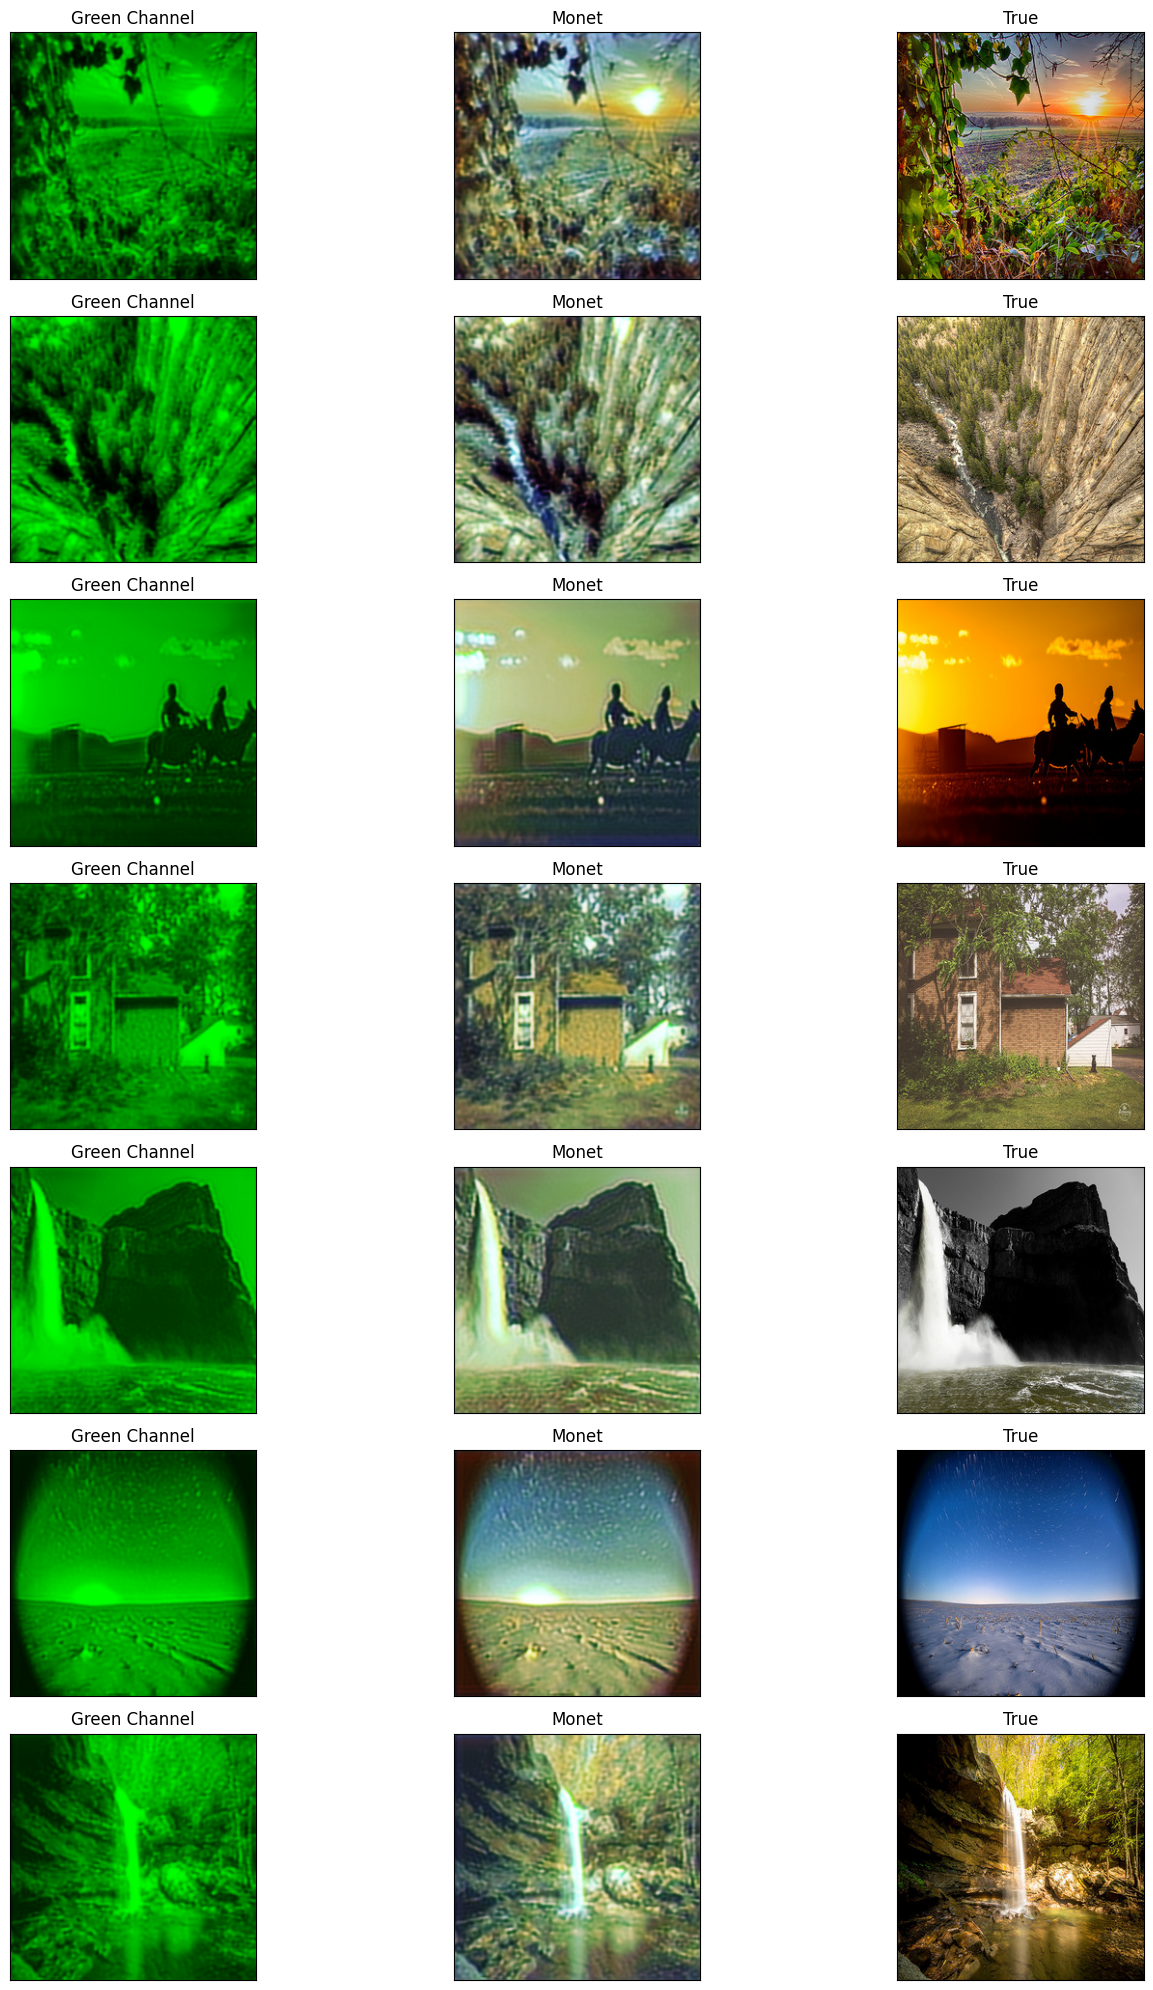

In [ ]:
plot_test(name)

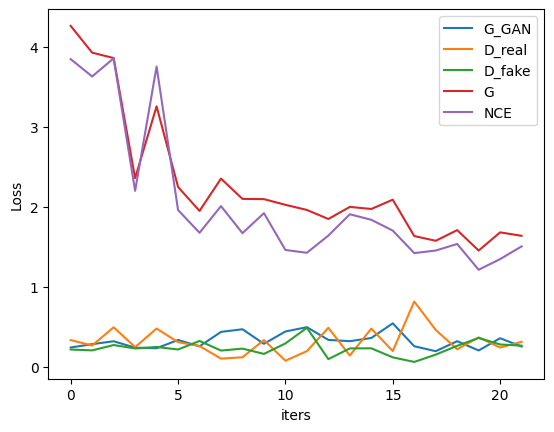

In [ ]:
plot_losses(name)

In [ ]:
# @inproceedings{park2020cut,
#   title={Contrastive Learning for Unpaired Image-to-Image Translation},
#   author={Taesung Park and Alexei A. Efros and Richard Zhang and Jun-Yan Zhu},
#   booktitle={European Conference on Computer Vision},
#   year={2020}
# }

In [ ]:
import time
import torch
from options.train_options import TrainOptions
from data import create_dataset
from models import create_model
from util.visualizer import Visualizer
from torch import nn

def train(opt, model):
    # opt = TrainOptions().parse()   # get training options
    dataset = create_dataset(opt)  # create a dataset given opt.dataset_mode and other options
    dataset_size = len(dataset)    # get the number of images in the dataset.  # trainB, 214
    # model = create_model(opt)
    print('The number of training images = %d' % dataset_size)

    visualizer = Visualizer(opt)   # create a visualizer that display/save images and plots
    opt.visualizer = visualizer
    total_iters = 0                # the total number of training iterations

    optimize_time = 0.1

    times = []
    for epoch in range(opt.epoch_count, opt.n_epochs + opt.n_epochs_decay + 1):    # outer loop for different epochs; we save the model by <epoch_count>, <epoch_count>+<save_latest_freq>
        epoch_start_time = time.time()  # timer for entire epoch
        iter_data_time = time.time()    # timer for data loading per iteration
        epoch_iter = 0                  # the number of training iterations in current epoch, reset to 0 every epoch
        visualizer.reset()              # reset the visualizer: make sure it saves the results to HTML at least once every epoch

        dataset.set_epoch(epoch)
        for i, data in enumerate(dataset):  # inner loop within one epoch
            iter_start_time = time.time()  # timer for computation per iteration
            if total_iters % opt.print_freq == 0:
                t_data = iter_start_time - iter_data_time

            batch_size = data["A"].size(0)
            total_iters += batch_size
            epoch_iter += batch_size
            if len(opt.gpu_ids) > 0:
                torch.cuda.synchronize()
            optimize_start_time = time.time()
            if epoch == opt.epoch_count and i == 0:
                model.data_dependent_initialize(data)
                model.setup(opt)               # regular setup: load and print networks; create schedulers
                model.parallelize()
            model.set_input(data)  # unpack data from dataset and apply preprocessing
            model.optimize_parameters()   # calculate loss functions, get gradients, update network weights
            if len(opt.gpu_ids) > 0:
                torch.cuda.synchronize()
            optimize_time = (time.time() - optimize_start_time) / batch_size * 0.005 + 0.995 * optimize_time

            # if total_iters % opt.display_freq == 0:   # display images on visdom and save images to a HTML file
            #     save_result = total_iters % opt.update_html_freq == 0
            #      model.compute_visuals()
            #      visualizer.display_current_results(model.get_current_visuals(), epoch, save_result)

            if total_iters % opt.print_freq == 0:    # print training losses and save logging information to the disk
                losses = model.get_current_losses()
                visualizer.print_current_losses(epoch, epoch_iter, losses, optimize_time, t_data)
                if opt.display_id is None or opt.display_id > 0:
                    visualizer.plot_current_losses(epoch, float(epoch_iter) / dataset_size, losses)

            if total_iters % opt.save_latest_freq == 0:   # cache our latest model every <save_latest_freq> iterations
                print('saving the latest model (epoch %d, total_iters %d)' % (epoch, total_iters))
                print(opt.name)  # it's useful to occasionally show the experiment name on console
                save_suffix = 'iter_%d' % total_iters if opt.save_by_iter else 'latest'
                model.save_networks(save_suffix)

            iter_data_time = time.time()

        if epoch % opt.save_epoch_freq == 0:              # cache our model every <save_epoch_freq> epochs
            print('saving the model at the end of epoch %d, iters %d' % (epoch, total_iters))
            model.save_networks('latest')
            model.save_networks(epoch)

        print('End of epoch %d / %d \t Time Taken: %d sec' % (epoch, opt.n_epochs + opt.n_epochs_decay, time.time() - epoch_start_time))
        model.update_learning_rate()                     # update learning rates at the end of every epoch.


In [ ]:
# ------------------#
# ResBlock+CBAM
# ------------------#
import torch
import torch.nn as nn
import torchvision


class ChannelAttentionModule(nn.Module):
    def __init__(self, channel, ratio=16):
        super(ChannelAttentionModule, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.shared_MLP = nn.Sequential(
            nn.Conv2d(channel, channel // ratio, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(channel // ratio, channel, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avgout = self.shared_MLP(self.avg_pool(x))
        print(avgout.shape)
        maxout = self.shared_MLP(self.max_pool(x))
        return self.sigmoid(avgout + maxout)


class SpatialAttentionModule(nn.Module):
    def __init__(self):
        super(SpatialAttentionModule, self).__init__()
        self.conv2d = nn.Conv2d(in_channels=2, out_channels=1, kernel_size=7, stride=1, padding=3)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avgout = torch.mean(x, dim=1, keepdim=True)
        maxout, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avgout, maxout], dim=1)
        out = self.sigmoid(self.conv2d(out))
        return out


class CBAM(nn.Module):
    def __init__(self, channel):
        super(CBAM, self).__init__()
        self.channel_attention = ChannelAttentionModule(channel)
        self.spatial_attention = SpatialAttentionModule()

    def forward(self, x):
        out = self.channel_attention(x) * x
        print('outchannels:{}'.format(out.shape))
        out = self.spatial_attention(out) * out
        return out


class ResBlock_CBAM(nn.Module):
    def __init__(self,in_places, places, stride=1,downsampling=False, expansion = 4):
        super(ResBlock_CBAM,self).__init__()
        self.expansion = expansion
        self.downsampling = downsampling

        self.bottleneck = nn.Sequential(
            nn.Conv2d(in_channels=in_places,out_channels=places,kernel_size=1,stride=1, bias=False),
            nn.BatchNorm2d(places),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=places, out_channels=places, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(places),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=places, out_channels=places*self.expansion, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(places*self.expansion),
        )
        self.cbam = CBAM(channel=places*self.expansion)

        if self.downsampling:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels=in_places, out_channels=places*self.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(places*self.expansion)
            )
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = x
        out = self.bottleneck(x)
        print(x.shape)
        out = self.cbam(out)
        if self.downsampling:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)
        return out


model = ResBlock_CBAM(in_places=16, places=4)
print(model)

input = torch.randn(1, 16, 64, 64)
out = model(input)
print(out.shape)



ResBlock_CBAM(
  (bottleneck): Sequential(
    (0): Conv2d(16, 4, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(4, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (7): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (cbam): CBAM(
    (channel_attention): ChannelAttentionModule(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (max_pool): AdaptiveMaxPool2d(output_size=1)
      (shared_MLP): Sequential(
        (0): Conv2d(16, 1, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): ReLU()
        (2): Conv2d(1, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (sigmoid): Sigmoid()
    )

In [ ]:
from models.networks import ResnetBlock
from torch import nn

from argparse import Namespace
from math import inf


dataroot = './datasets/m2p_mini'
opt_dict = dict(dataroot=dataroot, name='photo2mn_cut1', easy_label='experiment_name',
                gpu_ids=[0], checkpoints_dir='./checkpoints', model='cut', input_nc=3, output_nc=3, ngf=64,
                ndf=64, netD='basic', netG='resnet_9blocks', n_layers_D=3, normG='instance', normD='instance',
                init_type='xavier', init_gain=0.02, no_dropout=True, no_antialias=False, no_antialias_up=False,
                dataset_mode='unaligned', direction='BtoA', serial_batches=False, num_threads=4, batch_size=1, load_size=286,
                crop_size=256, max_dataset_size=inf, preprocess='resize_and_crop', no_flip=False, display_winsize=256, random_scale_max=3.0,
                epoch='latest', verbose=False, suffix='', stylegan2_G_num_downsampling=1, display_freq=400, display_ncols=4, display_id=None,
                display_server='http://localhost', display_env='main', display_port=8097, update_html_freq=1000, print_freq=100, no_html=False,
                save_latest_freq=5000, save_epoch_freq=5, evaluation_freq=5000, save_by_iter=False, continue_train=False, epoch_count=1,
                phase='train', pretrained_name=None, n_epochs=2, n_epochs_decay=0, beta1=0.5, beta2=0.999, lr=0.0002, gan_mode='lsgan',
                pool_size=0, lr_policy='linear', lr_decay_iters=50, CUT_mode='FastCUT', lambda_GAN=1.0, lambda_NCE=10.0, nce_idt=False,
                nce_layers='0,4,8,12,16', nce_includes_all_negatives_from_minibatch=False, netF='mlp_sample', netF_nc=256, nce_T=0.07, num_patches=256, flip_equivariance=True, isTrain=True)
opt = Namespace(**opt_dict)

%env name = photo2monet2
name = 'photo2monet2'

opt_dict['n_epochs'] = 20
opt_dict['n_epochs_decay'] = 2
opt_dict['name'] = name
opt = Namespace(**opt_dict)
model = create_model(opt)      # create a model given opt.model and other options


# 将CBAM加入模型
count=0
for m in model.netG.model:
    if m.__class__ == ResnetBlock:
        m.conv_block.add_module(f'cbam{count}',CBAM(m.conv_block[-2].out_channels).to('cuda'))
        count+=1

train(opt, model)

env: name=photo2monet2


model [CUTModel] was created
dataset [UnalignedDataset] was created
The number of training images = 100
create web directory ./checkpoints/photo2monet2/web...
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1]

/content/CUT/models/networks.py:569: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  patch_id = torch.tensor(patch_id, dtype=torch.long, device=feat.device)


流式输出内容被截断，只能显示最后 5000 行内容。
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1

In [ ]:
import os
from options.test_options import TestOptions
from data import create_dataset
from models import create_model
from util.visualizer import save_images
from util import html
import util.util as util


def test(opt, model):
    # opt = TestOptions().parse()  # get test options
    # hard-code some parameters for test
    opt.num_threads = 0   # test code only supports num_threads = 1
    opt.batch_size = 1    # test code only supports batch_size = 1
    opt.serial_batches = True  # disable data shuffling; comment this line if results on randomly chosen images are needed.
    opt.no_flip = True    # no flip; comment this line if results on flipped images are needed.
    opt.display_id = -1   # no visdom display; the test code saves the results to a HTML file.
    dataset = create_dataset(opt)  # create a dataset given opt.dataset_mode and other options
    train_dataset = create_dataset(util.copyconf(opt, phase="train"))
    # model = create_model(opt)      # create a model given opt.model and other options
    # create a webpage for viewing the results
    web_dir = os.path.join(opt.results_dir, opt.name, '{}_{}'.format(opt.phase, opt.epoch))  # define the website directory
    print('creating web directory', web_dir)
    webpage = html.HTML(web_dir, 'Experiment = %s, Phase = %s, Epoch = %s' % (opt.name, opt.phase, opt.epoch))

    for i, data in enumerate(dataset):
        if i == 0:
            model.data_dependent_initialize(data)
            model.setup(opt)               # regular setup: load and print networks; create schedulers
            model.parallelize()
            if opt.eval:
                model.eval()
        if i >= opt.num_test:  # only apply our model to opt.num_test images.
            break
        model.set_input(data)  # unpack data from data loader
        model.test()           # run inference
        visuals = model.get_current_visuals()  # get image results
        img_path = model.get_image_paths()     # get image paths
        if i % 5 == 0:  # save images to an HTML file
            print('processing (%04d)-th image... %s' % (i, img_path))
        save_images(webpage, visuals, img_path, width=opt.display_winsize)
    webpage.save()  # save the HTML


In [ ]:
opt_dict = dict(dataroot=dataroot, name=name, easy_label='experiment_name',
                gpu_ids=[0], checkpoints_dir='./checkpoints', model='cut', input_nc=3,
                output_nc=3, ngf=64, ndf=64, netD='basic', netG='resnet_9blocks', n_layers_D=3,
                normG='instance', normD='instance', init_type='xavier', init_gain=0.02, no_dropout=True,
                no_antialias=False, no_antialias_up=False, dataset_mode='unaligned', direction='AtoB', serial_batches=False, num_threads=4, batch_size=1, load_size=256, crop_size=256, max_dataset_size=inf, preprocess='resize_and_crop', no_flip=False, display_winsize=256, random_scale_max=3.0, epoch='latest', verbose=False, suffix='', stylegan2_G_num_downsampling=1, results_dir='./results/', phase='train', eval=False, num_test=50, CUT_mode='CUT', lambda_GAN=1.0, lambda_NCE=1.0, nce_idt=True, nce_layers='0,4,8,12,16', nce_includes_all_negatives_from_minibatch=False, netF='mlp_sample', netF_nc=256, nce_T=0.07,
                num_patches=256, flip_equivariance=False, pool_size=0, isTrain=False)
opt_dict['direction'] = 'BtoA'
opt = Namespace(**opt_dict)
model = create_model(opt)
count=0
for m in model.netG.model:
    if m.__class__ == ResnetBlock:
        m.conv_block.add_module(f'cbam{count}',CBAM(m.conv_block[-2].out_channels).to('cuda'))
        count+=1

test(opt, model)

model [CUTModel] was created
dataset [UnalignedDataset] was created
dataset [UnalignedDataset] was created
creating web directory ./results/photo2monet2/train_latest
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 1, 1])
outchannels:torch.Size([1, 256, 64, 64])
loading the model from ./checkpoints/photo2monet2/latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 11.453 M
-----------------------------------------------
torch.Size(